In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Input

In [2]:
num_classes = 10

In [21]:
batch_size = 64
epochs = 24
input_shape = (28,28,1)

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

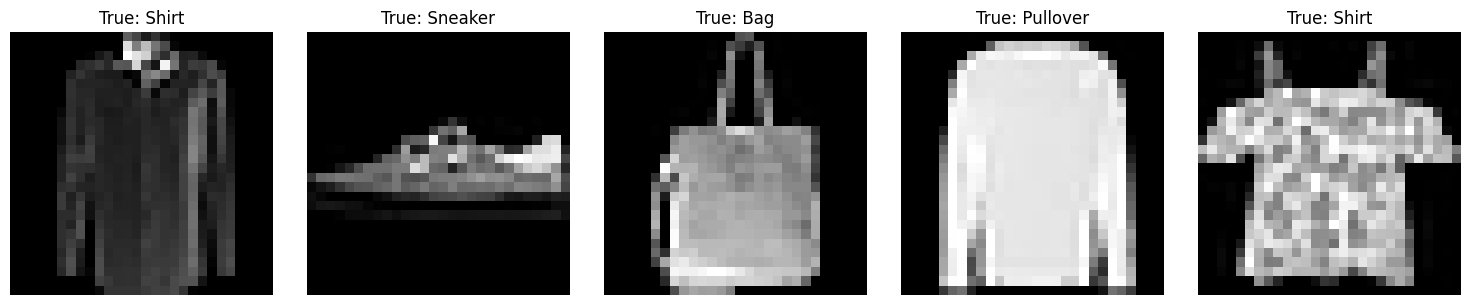

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 5 random indices
random_indices = np.random.choice(x_test.shape[0], size=5, replace=False)

# Plotting
plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    true_label = np.argmax(ytest[idx])

    # Predict
    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_label = np.argmax(pred)

    # Plot
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
x_train = x_train.reshape(

In [8]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape : ', x_train.shape)
print('x_test shape : ',x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape :  (60000, 28, 28, 1)
x_test shape :  (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [31]:
ytrain = tf.keras.utils.to_categorical(y_train, num_classes)
ytest = tf.keras.utils.to_categorical(y_test, num_classes)

In [36]:
model = Sequential()

In [37]:
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


In [41]:

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, ytrain,
                 batch_size=64,
                 epochs=24,
                 verbose=1,
                 validation_data=(x_test, ytest))


Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9026 - loss: 0.2635 - val_accuracy: 0.8851 - val_loss: 0.3251
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9053 - loss: 0.2543 - val_accuracy: 0.8930 - val_loss: 0.3094
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9062 - loss: 0.2507 - val_accuracy: 0.8833 - val_loss: 0.3243
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9044 - loss: 0.2522 - val_accuracy: 0.8853 - val_loss: 0.3274
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9075 - loss: 0.2448 - val_accuracy: 0.8927 - val_loss: 0.3039
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9108 - loss: 0.2408 - val_accuracy: 0.8914 - val_loss: 0.3064
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9081 - loss: 0.2397 - val_accuracy: 0.8869 - val_loss: 0.3163
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9108 - loss: 0.2375 - val_accuracy: 0.

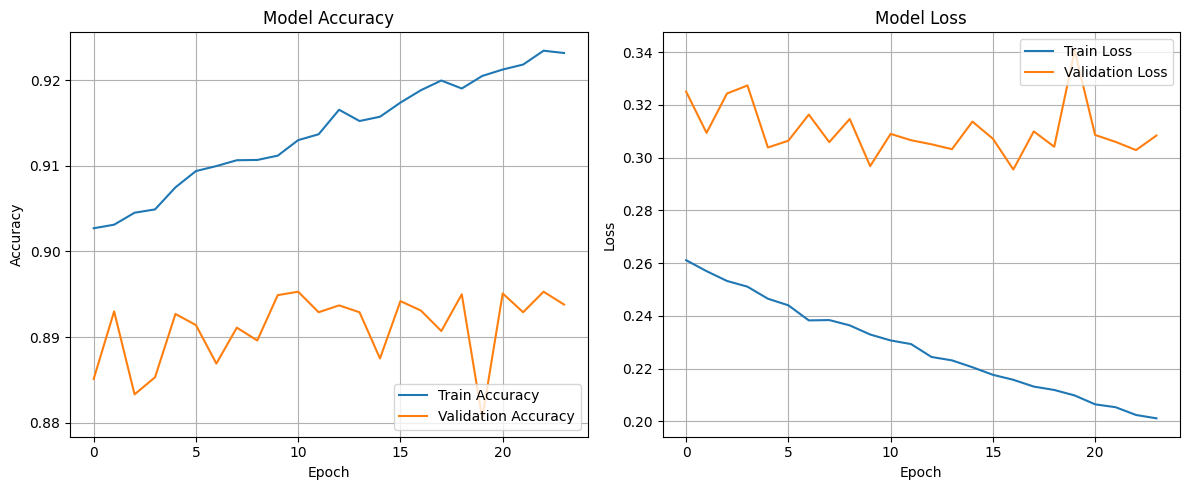

In [42]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

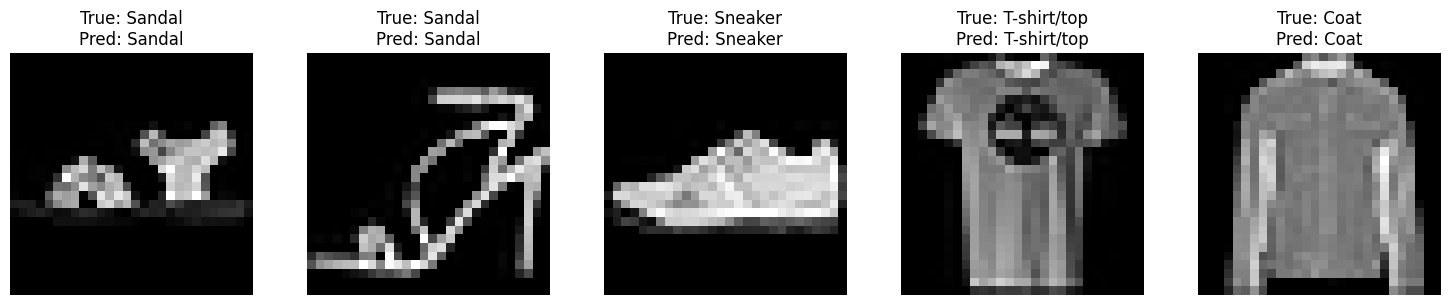

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 5 random indices
random_indices = np.random.choice(x_test.shape[0], size=5, replace=False)

# Plotting
plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    true_label = np.argmax(ytest[idx])

    # Predict
    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_label = np.argmax(pred)

    # Plot
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import classification_report

# Predict on x_test
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot ytest back to label indices
y_true = np.argmax(ytest, axis=1)

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)


              precision    recall  f1-score   support

 T-shirt/top     0.8462    0.8200    0.8329      1000
     Trouser     0.9928    0.9720    0.9823      1000
    Pullover     0.7880    0.8700    0.8270      1000
       Dress     0.8712    0.9270    0.8983      1000
        Coat     0.8394    0.8100    0.8244      1000
      Sandal     0.9848    0.9690    0.9768      1000
       Shirt     0.7441    0.6600    0.6995      1000
     Sneaker     0.9481    0.9680    0.9579      1000
         Bag     0.9506    0.9820    0.9661      1000
  Ankle boot     0.9658    0.9600    0.9629      1000

    accuracy                         0.8938     10000
   macro avg     0.8931    0.8938    0.8928     10000
weighted avg     0.8931    0.8938    0.8928     10000

